# Import Library: 분석에 사용할 모듈 설치
**1. Import Library**

In [ ]:
!python -m pip install --user --upgrade pip
!pip install tqdm
!pip install xgboost
!pip install lightgbm

In [26]:
# # Auto reload
%reload_ext autoreload
%autoreload 2
from module import *

* import 할게 너무 많아지면, jupyter notebook에서 새파일 -> 텍스트 파일을 만들어서 module.py 와 같이 파이썬 파일로 만들어준다.

* 중간에 module 내부의 함수를 수정/추가 하고 싶으면, 다시 불러와야 한다.
    * 만약 위 코드처럼 reload_ext ~ 부터 하면 자동으로 업데이트 할 수 있다.

# Applying Base Model: Y예측을 위한 Regression분석 실행

## Code Summary (Raw Data)

Train_size: (13128, 12) Test_size: (4416, 12)
X_train: (13128, 8) Y_train: (13128, 1)
X_test: (4416, 8) Y_test: (4416, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                              2889.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:03:24   Log-Likelihood:                         -83421.
No. Observations:               13128   AIC:                                  1.669e+05
Df Residuals:                   13120   BIC:                                  1.669e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season         3.3659      1.286      2.618      0.009       0.846       5.886
holiday       -6.2896      7.466     -0.842      0.400     -20.924       8.345
workingday    10.3553      2.641      3.921      0.000       5.178      15.533
weather        7.1906      2.093      3.436      0.001       3.089      11.292
temp          -7.8544      1.222     -6.429      0.000     -10.249      -5.460
atemp         16.0695      1.095     14.676      0.000      13.923      18.216
humidity      -1.7353      0.063    -27.356      0.000      -1.860      -1.611
windspeed      2.2749      0.136     16.745      0.000       2.009       2.541
==============================================================================
Omnibus:                     2168.771   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3942.747
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       4.672   Cond. No.                         450.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,MAE,MSE,MAPE
Train,103.09,"19,360.42",458.48
Test,150.03,"43,410.27",316.61


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

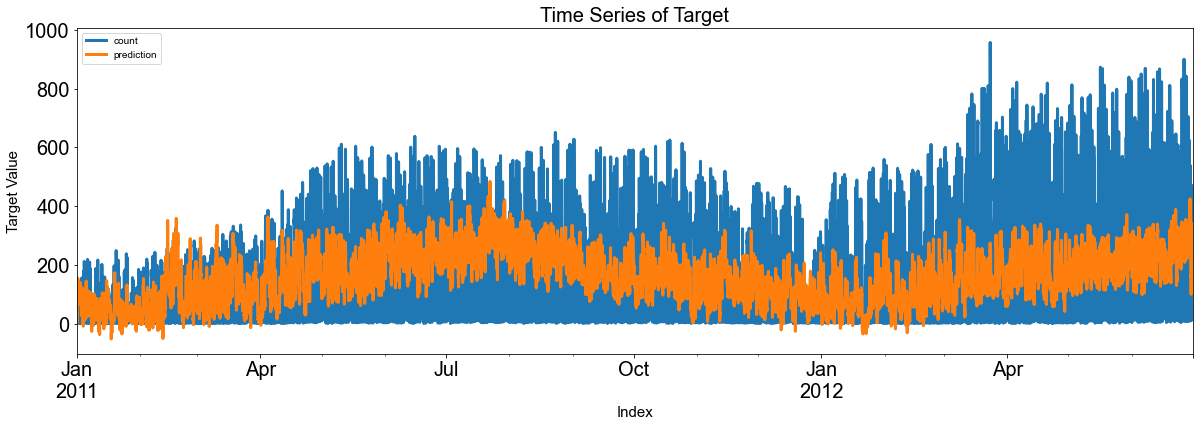

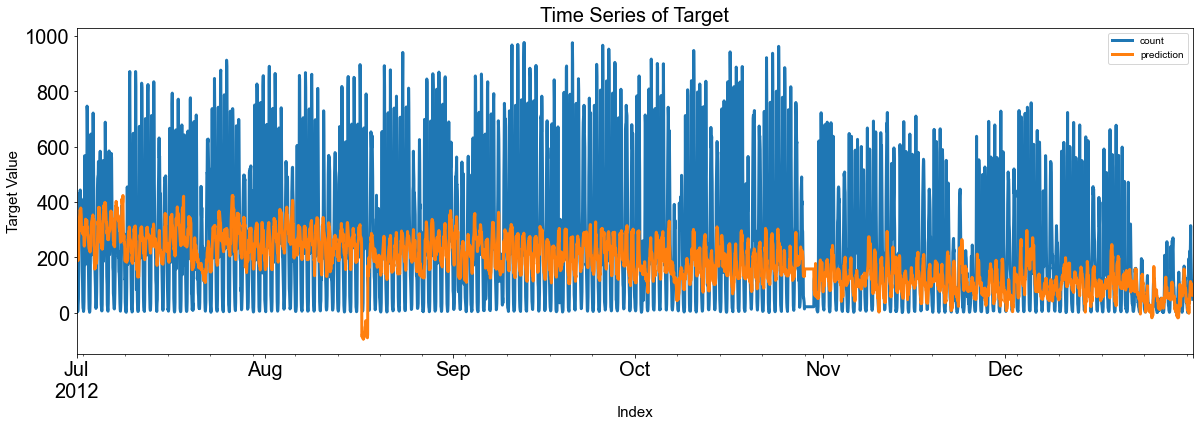

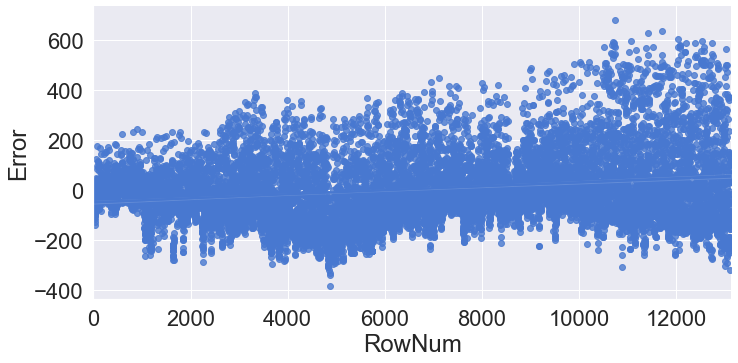

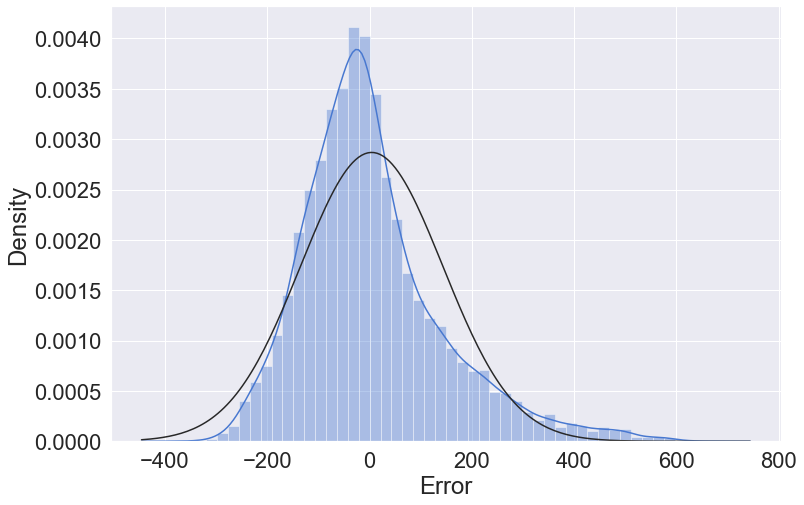

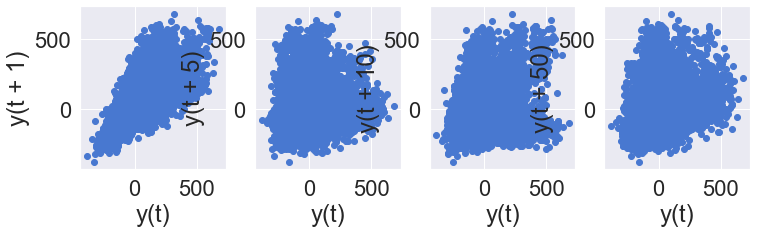

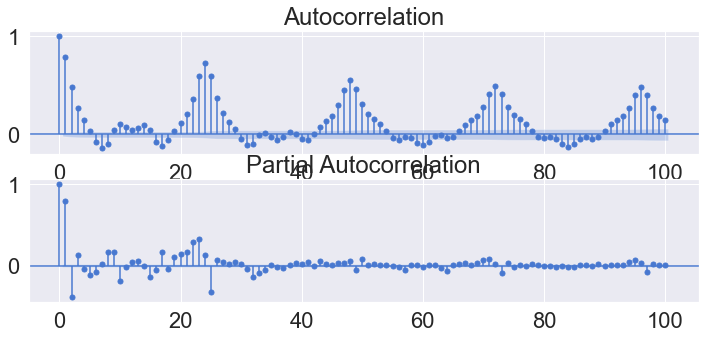

In [3]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_rd = non_feature_engineering(raw_all)

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_rd.columns if x not in Y_colname+X_remove]
X_train_rd, X_test_rd, Y_train_rd, Y_test_rd = datasplit_ts(raw_rd, Y_colname, X_colname, '2012-07-01')

# Applying Base Model
fit_reg1_rd = sm.OLS(Y_train_rd, X_train_rd).fit()
display(fit_reg1_rd.summary())
pred_tr_reg1_rd = fit_reg1_rd.predict(X_train_rd).values
pred_te_reg1_rd = fit_reg1_rd.predict(X_test_rd).values

# Evaluation
Score_reg1_rd, Resid_tr_reg1_rd, Resid_te_reg1_rd = evaluation_trte(Y_train_rd, pred_tr_reg1_rd, 
                                                                Y_test_rd, pred_te_reg1_rd, graph_on=True)
display(Score_reg1_rd)

# Error Analysis
error_analysis(Resid_tr_reg1_rd, ['Error'], X_train_rd, graph_on=True)

## Code Summary (Feature Engineering Data)

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              6925.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:03:30   Log-Likelihood:                         -77008.
No. Observations:               13128   AIC:                                  1.540e+05
Df Residuals:                   13116   BIC:                                  1.541e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
count_diff      1289.2806     25.881     49.816      0.000    1238.550    1340.011
holiday         7.141e+04   1.01e+04      7.044      0.000    5.15e+04    9.13e+04
count_seasonal  1270.9307     16.107     78.906      0.000    1239.359    1302.503
Day             1151.2606    168.230      6.843      0.000     821.505    1481.017
windspeed       -234.1084    180.733     -1.295      0.195    -588.370     120.154
Quater_ver2     2.865e+04    930.475     30.787      0.000    2.68e+04    3.05e+04
Hour           -3514.0425    282.316    -12.447      0.000   -4067.422   -2960.663
weather        -2.423e+04   2238.550    -10.825      0.000   -2.86e+04   -1.98e+04
Quater_Dummy_2  6.725e+04   3436.993     19.566      0.000    6.05e+04     7.4e+04
DayofWeek       1.621e+04    912.387     17.768      0.000    1.44e+04     1.8e+04
workingday      7.695e+04   4056.717     18.970      0.000     6.9e+04    8.49e+04
count_lag2      1061.0008     14.379     73.788      0.000    1032.816    1089.186
==============================================================================
Omnibus:                     1665.324   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5853.426
Skew:                           0.626   Prob(JB):                         0.00
Kurtosis:                       6.022   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,MAE,MSE,MAPE
Train,60.84,"7,288.40",202.42
Test,99.87,"19,151.40",153.34


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

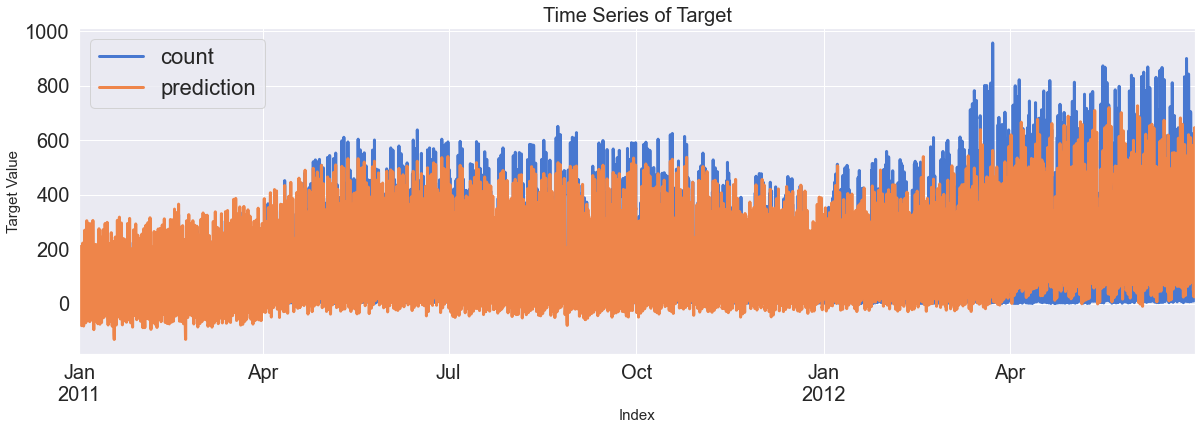

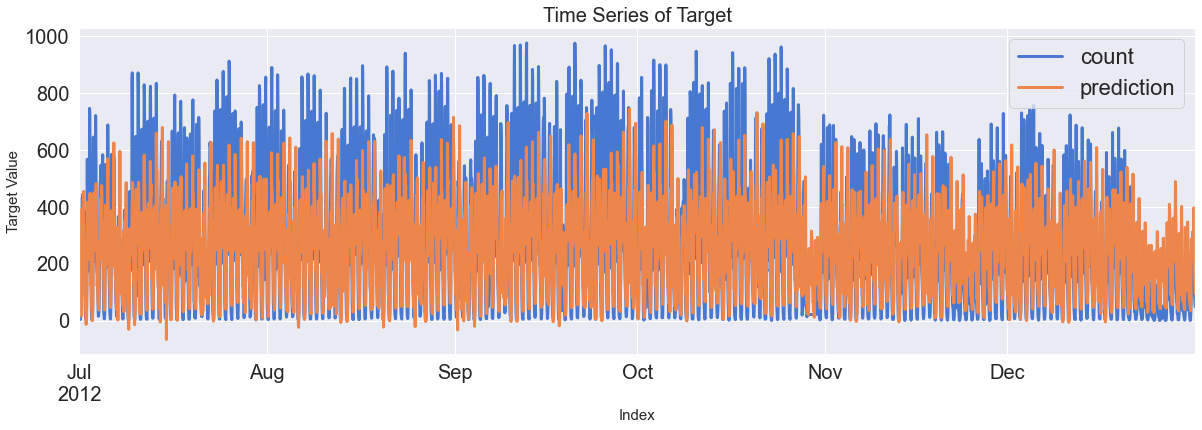

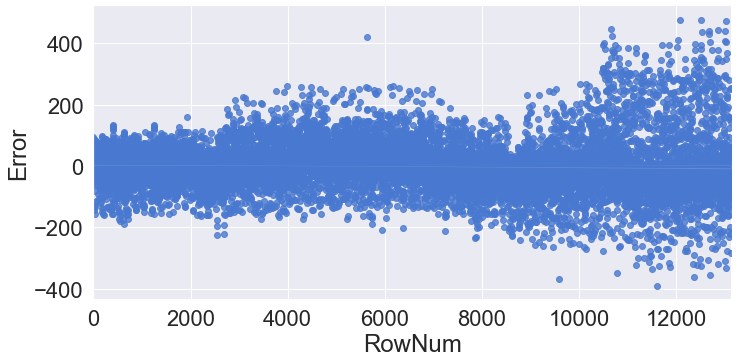

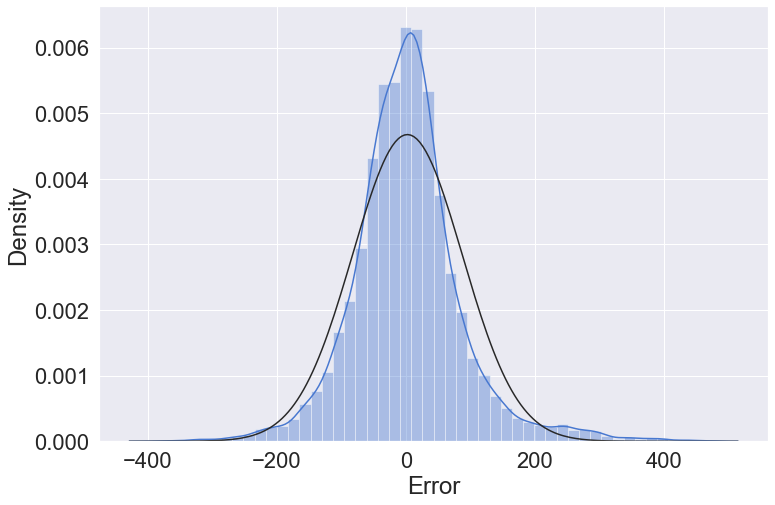

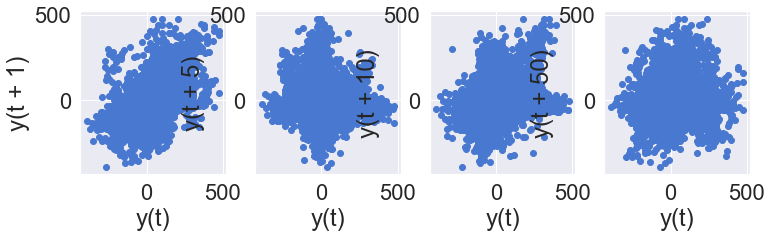

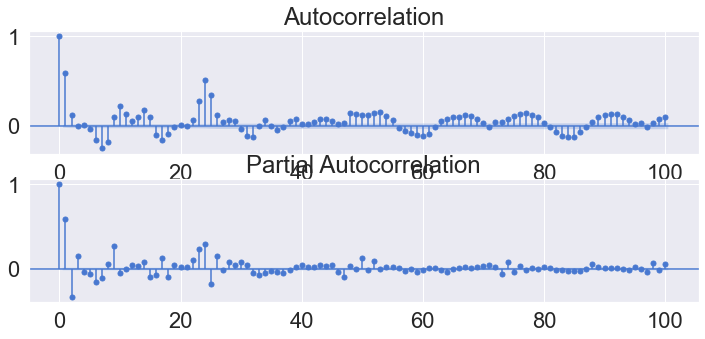

In [4]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# Applying Base Model
fit_reg1_feRSM = sm.OLS(Y_train_feR, X_train_feRSM).fit()
display(fit_reg1_feRSM.summary())
pred_tr_reg1_feRSM = fit_reg1_feRSM.predict(X_train_feRSM).values
pred_te_reg1_feRSM = fit_reg1_feRSM.predict(X_test_feRSM).values

# Evaluation
Score_reg1_feRSM, Resid_tr_reg1_feRSM, Resid_te_reg1_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg1_feRSM,
                                                                   Y_test_feR, pred_te_reg1_feRSM, graph_on=True)
display(Score_reg1_feRSM)

# Error Analysis
error_analysis(Resid_tr_reg1_feRSM, ['Error'], X_train_feRSM, graph_on=True)

In [5]:
display(Score_reg1_rd)
display(Score_reg1_feRSM)

,MAE,MSE,MAPE
Train,103.09,"19,360.42",458.48
Test,150.03,"43,410.27",316.61


,MAE,MSE,MAPE
Train,60.84,"7,288.40",202.42
Test,99.87,"19,151.40",153.34


# Applying Agile Model: Y예측을 위한 ML분석 실행

## Regularization

,MAE,MSE,MAPE
Train,60.04,"7,959.30",118.70
Test,98.43,"21,413.08",88.86


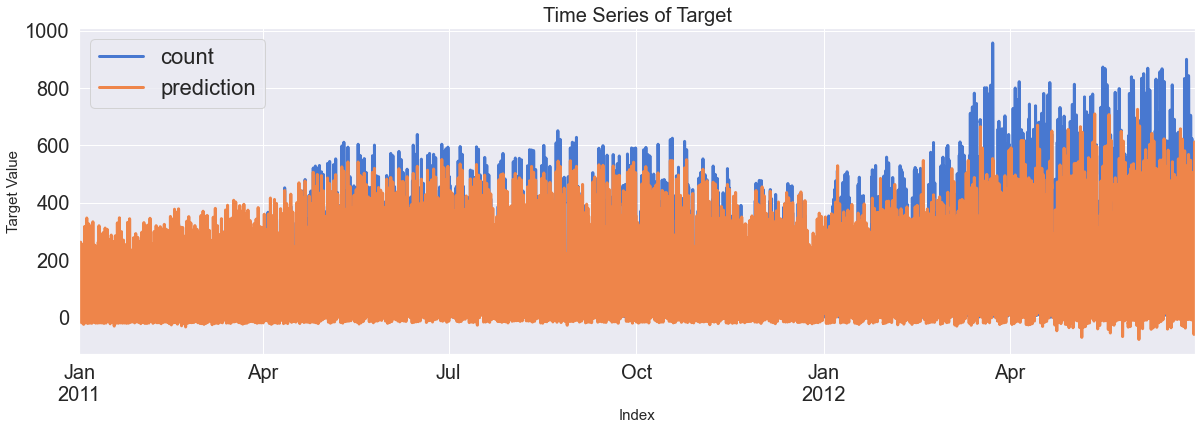

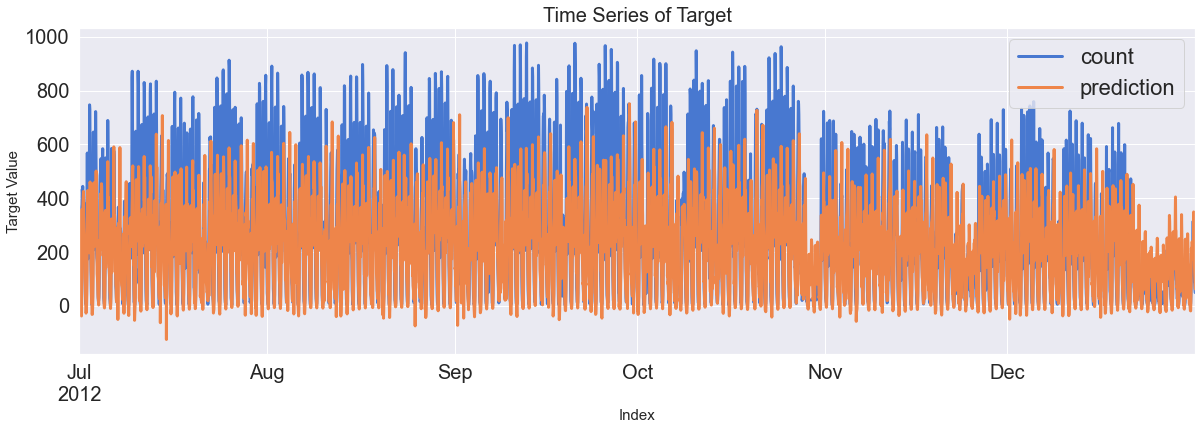

In [9]:
### Regularization
# Ridge
fit_reg2 = Ridge(alpha=0.5, fit_intercept=True, normalize=False, random_state=123).fit(X_train_feRSM, Y_train_feR)
pred_tr_reg2_feRSM = fit_reg2.predict(X_train_feRSM).flatten()
pred_te_reg2_feRSM = fit_reg2.predict(X_test_feRSM).flatten()

# Evaluation
Score_reg2_feRSM, Resid_tr_reg2_feRSM, Resid_te_reg2_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg2_feRSM,
                                                                   Y_test_feR, pred_te_reg2_feRSM, graph_on=True)
display(Score_reg2_feRSM)

,MAE,MSE,MAPE
Train,61.82,"8,437.85",97.47
Test,98.13,"22,101.64",75.46


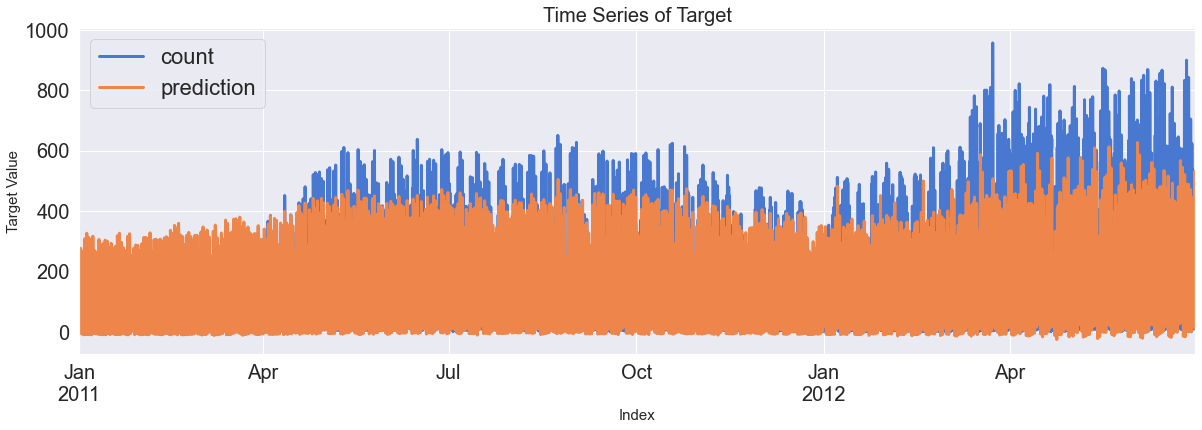

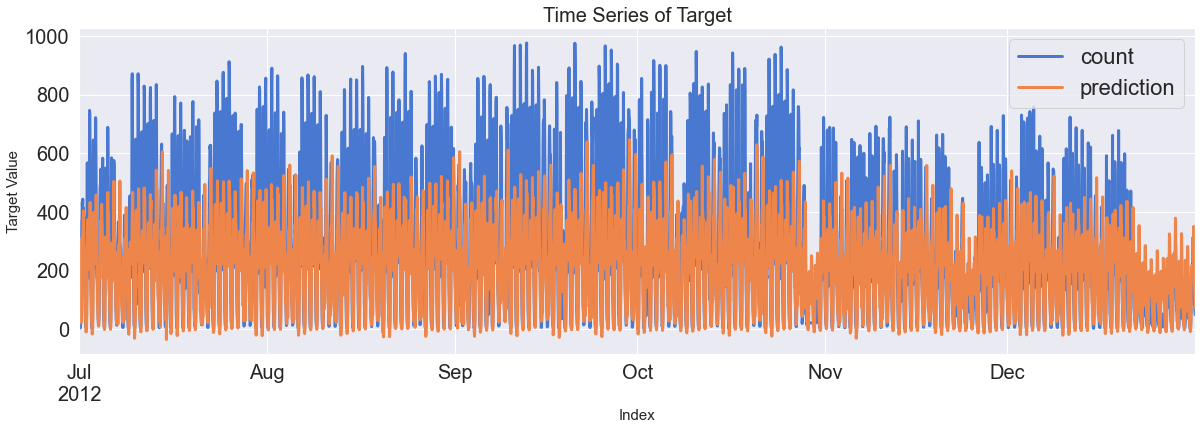

In [10]:
# Lasso
fit_reg3 = Lasso(alpha=0.5, fit_intercept=True, normalize=False, random_state=123).fit(X_train_feRSM, Y_train_feR)
pred_tr_reg3_feRSM = fit_reg3.predict(X_train_feRSM)
pred_te_reg3_feRSM = fit_reg3.predict(X_test_feRSM)

# Evaluation
Score_reg3_feRSM, Resid_tr_reg3_feRSM, Resid_te_reg3_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg3_feRSM,
                                                                   Y_test_feR, pred_te_reg3_feRSM, graph_on=True)
display(Score_reg3_feRSM)

,MAE,MSE,MAPE
Train,58.71,"7,562.05",123.42
Test,96.85,"20,015.70",94.72


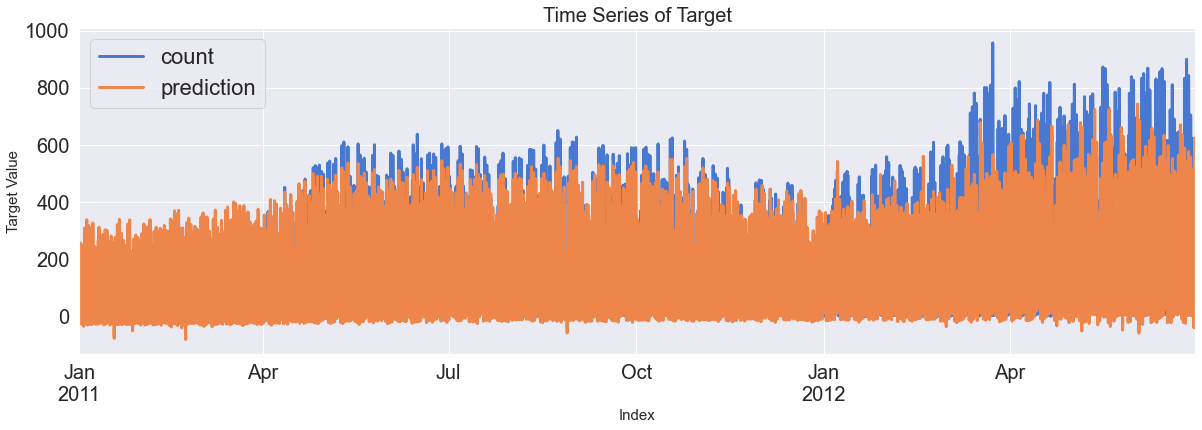

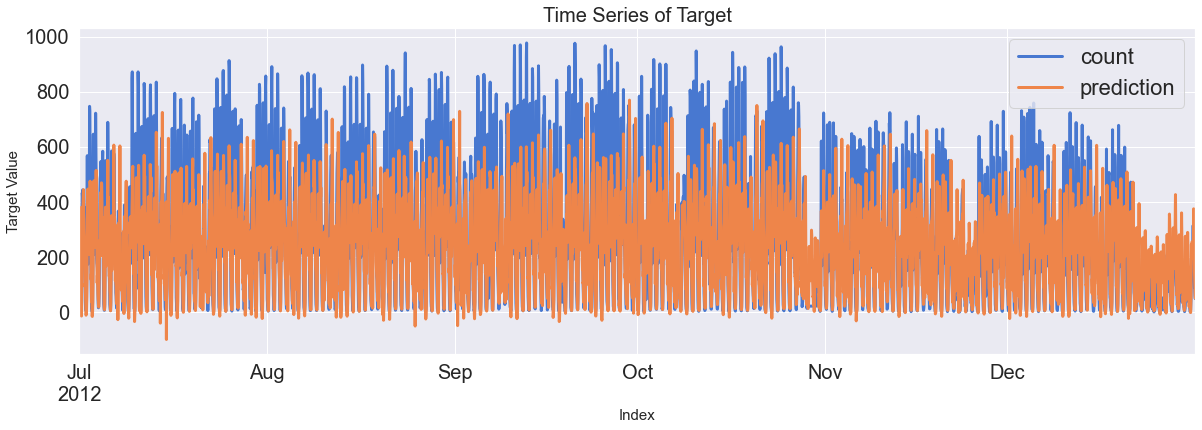

In [12]:
# ElasticNet
# alpha, l1_ratio 가 elasticnet 에 있는 두개의 파라미터이다.
fit_reg4 = ElasticNet(alpha=0.01, l1_ratio=1, fit_intercept=True, normalize=False, random_state=123).fit(X_train_feRSM, Y_train_feR)
pred_tr_reg4_feRSM = fit_reg4.predict(X_train_feRSM)
pred_te_reg4_feRSM = fit_reg4.predict(X_test_feRSM)

# Evaluation
Score_reg4_feRSM, Resid_tr_reg4_feRSM, Resid_te_reg4_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg4_feRSM,
                                                                   Y_test_feR, pred_te_reg4_feRSM, graph_on=True)
display(Score_reg4_feRSM)

## Bagging

In [14]:
### Bagging
# DecisionTree
fit_reg5 = DecisionTreeRegressor().fit(X_train_feRSM, Y_train_feR)
pred_tr_reg5_feRSM = fit_reg5.predict(X_train_feRSM)
pred_te_reg5_feRSM = fit_reg5.predict(X_test_feRSM)

# Evaluation
Score_reg5_feRSM, Resid_tr_reg5_feRSM, Resid_te_reg5_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg5_feRSM,
                                                                   Y_test_feR, pred_te_reg5_feRSM, graph_on=False)
display(Score_reg5_feRSM)

,MAE,MSE,MAPE
Train,0.00,0.00,0.00
Test,60.07,"9,151.07",42.47


In [15]:
# RandomForestRegressor
fit_reg6 = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train_feRSM, Y_train_feR)
pred_tr_reg6_feRSM = fit_reg6.predict(X_train_feRSM)
pred_te_reg6_feRSM = fit_reg6.predict(X_test_feRSM)

# Evaluation
Score_reg6_feRSM, Resid_tr_reg6_feRSM, Resid_te_reg6_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg6_feRSM,
                                                                   Y_test_feR, pred_te_reg6_feRSM, graph_on=False)
display(Score_reg6_feRSM)

,MAE,MSE,MAPE
Train,6.54,123.38,9.11
Test,51.52,"6,749.92",40.49


* <span style="color:blue">
    RandomForestRegressor 를 사용하면 DecisionTree 에 비해 test 의 성능이 더 좋아짐을 알 수 있다. -> 주 목적인 variance (분산, overfitting)이 줄어듬을 확인</span>

## Boosting

In [16]:
### Boosting
# GradientBoostingRegression
fit_reg7 = GradientBoostingRegressor(alpha=0.1, learning_rate=0.05, loss='huber', criterion='friedman_mse',
                                           n_estimators=1000, random_state=123).fit(X_train_feRSM, Y_train_feR)
pred_tr_reg7_feRSM = fit_reg7.predict(X_train_feRSM)
pred_te_reg7_feRSM = fit_reg7.predict(X_test_feRSM)

# Evaluation
Score_reg7_feRSM, Resid_tr_reg7_feRSM, Resid_te_reg7_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg7_feRSM,
                                                                   Y_test_feR, pred_te_reg7_feRSM, graph_on=False)
display(Score_reg7_feRSM)

,MAE,MSE,MAPE
Train,22.32,"1,697.59",27.59
Test,74.58,"9,957.45",139.73


In [17]:
# XGBoost
fit_reg8 = XGBRegressor(learning_rate=0.05, n_estimators=100, random_state=123).fit(X_train_feRSM, Y_train_feR)
pred_tr_reg8_feRSM = fit_reg8.predict(X_train_feRSM)
pred_te_reg8_feRSM = fit_reg8.predict(X_test_feRSM)

# Evaluation
Score_reg8_feRSM, Resid_tr_reg8_feRSM, Resid_te_reg8_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg8_feRSM,
                                                                   Y_test_feR, pred_te_reg8_feRSM, graph_on=False)
display(Score_reg8_feRSM)

,MAE,MSE,MAPE
Train,16.96,692.21,30.81
Test,52.55,"6,319.44",49.61


In [18]:
# LightGMB
fit_reg9 = LGBMRegressor(learning_rate=0.05, n_estimators=100, random_state=123).fit(X_train_feRSM, Y_train_feR)
pred_tr_reg9_feRSM = fit_reg9.predict(X_train_feRSM)
pred_te_reg9_feRSM = fit_reg9.predict(X_test_feRSM)

# Evaluation
Score_reg9_feRSM, Resid_tr_reg9_feRSM, Resid_te_reg9_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg9_feRSM,
                                                                   Y_test_feR, pred_te_reg9_feRSM, graph_on=False)
display(Score_reg9_feRSM)

,MAE,MSE,MAPE
Train,19.09,821.14,42.11
Test,51.46,"5,862.43",53.75


# FE Effect by Top Agile Algorithms

In [19]:
# Raw Data
# Tatget Setting
X_train = X_train_rd.copy()
X_test = X_test_rd.copy()
Y_train = Y_train_rd.copy()

# RandomForestRegressor

fit_reg6 = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr_reg6_feRSM = fit_reg6.predict(X_train)
pred_te_reg6_feRSM = fit_reg6.predict(X_test)

# Evaluation
Score_reg6_feRSM, Resid_tr_reg6_feRSM, Resid_te_reg6_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg6_feRSM,
                                                                   Y_test_feR, pred_te_reg6_feRSM, graph_on=False)
display(Score_reg6_feRSM)

,MAE,MSE,MAPE
Train,42.30,"4,095.47",170.65
Test,149.49,"43,966.29",301.65


In [20]:
# FE + Reality Data
# Tatget Setting
X_train = X_train_feR.copy()
X_test = X_test_feR.copy()
Y_train = Y_train_feR.copy()

# RandomForestRegressor
fit_reg6 = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr_reg6_feRSM = fit_reg6.predict(X_train)
pred_te_reg6_feRSM = fit_reg6.predict(X_test)

# Evaluation
Score_reg6_feRSM, Resid_tr_reg6_feRSM, Resid_te_reg6_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg6_feRSM,
                                                                   Y_test_feR, pred_te_reg6_feRSM, graph_on=False)
display(Score_reg6_feRSM)

,MAE,MSE,MAPE
Train,4.42,88.79,5.25
Test,80.77,"15,453.91",62.90


In [21]:
# FE + Reality + Scaling Data
# Tatget Setting
X_train = X_train_feRS.copy()
X_test = X_test_feRS.copy()
Y_train = Y_train_feR.copy()

# RandomForestRegressor
fit_reg6 = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr_reg6_feRSM = fit_reg6.predict(X_train)
pred_te_reg6_feRSM = fit_reg6.predict(X_test)

# Evaluation
Score_reg6_feRSM, Resid_tr_reg6_feRSM, Resid_te_reg6_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg6_feRSM,
                                                                   Y_test_feR, pred_te_reg6_feRSM, graph_on=False)
display(Score_reg6_feRSM)

,MAE,MSE,MAPE
Train,4.56,92.38,5.50
Test,82.80,"15,857.91",69.02


In [22]:
# FE + Reality + Scaling + Multicolinearity Data
# Tatget Setting
X_train = X_train_feRSM.copy()
X_test = X_test_feRSM.copy()
Y_train = Y_train_feR.copy()

# RandomForestRegressor
fit_reg6 = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr_reg6_feRSM = fit_reg6.predict(X_train)
pred_te_reg6_feRSM = fit_reg6.predict(X_test)

# Evaluation
Score_reg6_feRSM, Resid_tr_reg6_feRSM, Resid_te_reg6_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg6_feRSM,
                                                                   Y_test_feR, pred_te_reg6_feRSM, graph_on=False)
display(Score_reg6_feRSM)

,MAE,MSE,MAPE
Train,6.54,123.38,9.11
Test,51.52,"6,749.92",40.49


* <span style="color:blue">
    RandomForestRegressor 는 각 인자별로의 importance (영향력 아님, 트리를 구분할 때 데이터가 가장 잘 구분되는 순서를 말하는거임)를 알 수 있다.
</span>

In [23]:
fit_reg6.feature_importances_

array([0.0817894 , 0.00109728, 0.46938415, 0.00365062, 0.00308757,
       0.05487622, 0.05235716, 0.15952056, 0.00167149, 0.0226352 ,
       0.03876463, 0.11116572])

,importance
count_seasonal,0.47
weather,0.16
count_lag2,0.11
count_diff,0.08
Quater_ver2,0.05
Hour,0.05
workingday,0.04
DayofWeek,0.02
Day,0.00
windspeed,0.00


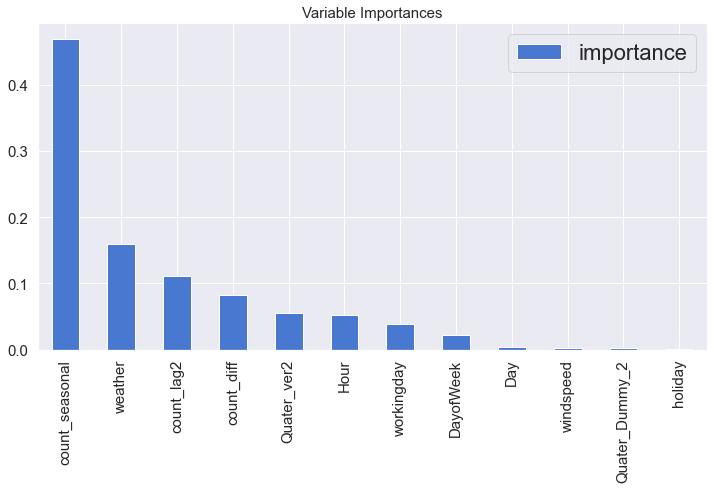

In [24]:
# Prediction Effect of Variables
Variable_Importances = pd.DataFrame([fit_reg6.feature_importances_], 
                                    columns=X_train_feRSM.columns, 
                                    index=['importance']).T.sort_values(by=['importance'], ascending=False)
display(Variable_Importances)
Variable_Importances.plot.bar(figsize=(12,6), fontsize=15)
plt.title('Variable Importances', fontsize=15)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

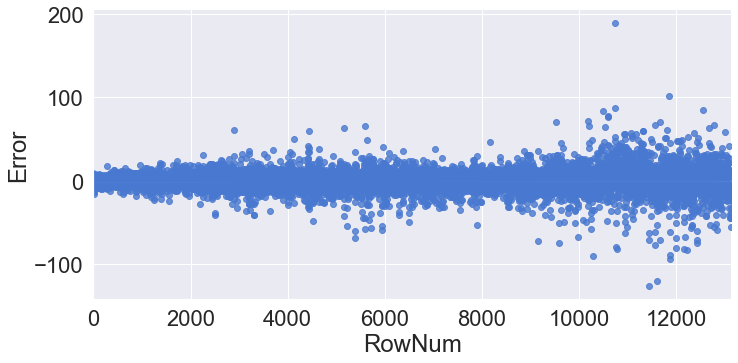

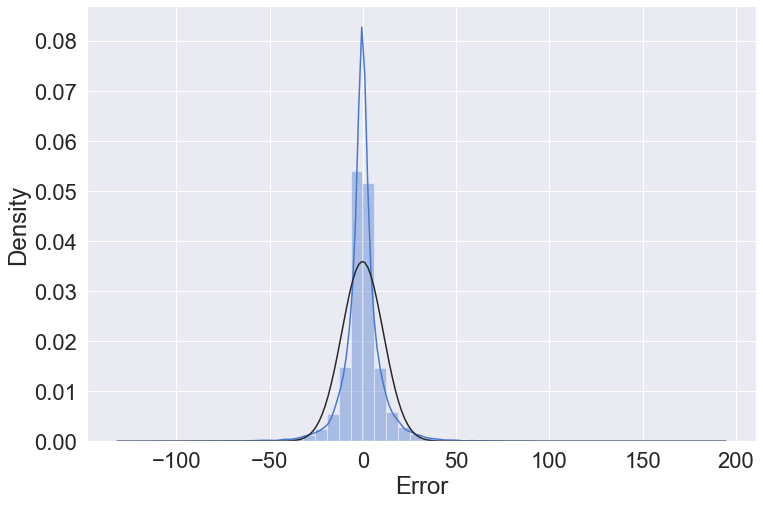

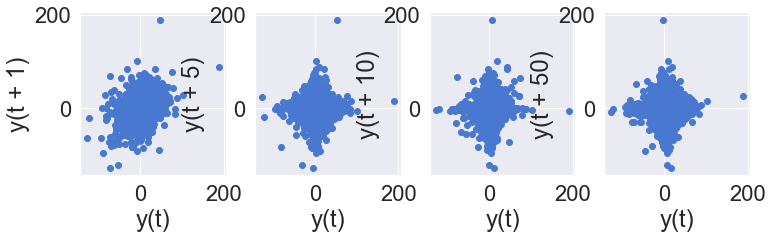

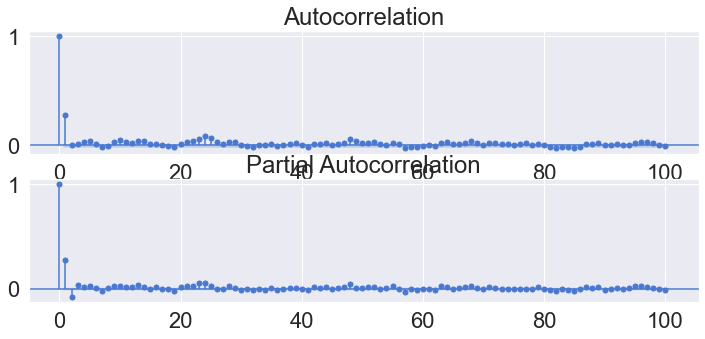

In [25]:
# Error Analysis
error_analysis(Resid_tr_reg6_feRSM, ['Error'], X_train_feRSM, graph_on=True)